In [1]:
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd

# Leer cada archivo por separado
df_plans = pd.read_json("plans.jsonlines", lines=True)
df_positions = pd.read_json("positions.jsonlines", lines=True)
df_simulation = pd.read_json("simulation.jsonlines", lines=True)

In [3]:
# Mostrar las primeras filas de cada uno
df_plans.head()

items  \
0  [{'itemId': '0', 'locationId': '326ae8dc7810de...   
1  [{'itemId': '0', 'locationId': '265a9178c2d6ca...   
2  [{'itemId': '0', 'locationId': '70b866cac59186...   
3  [{'itemId': '0', 'locationId': 'f3367090a09140...   
4  [{'itemId': '0', 'locationId': '86b0c901cebbf4...   

                           simulationId  \
0  2f6737c6-8d69-46b9-9534-68ffa2e7f7ad   
1  3fab69b5-fecc-4baa-b402-7da59b6bb23b   
2  89e71177-6a7b-41eb-858a-ecaf434fdd8b   
3  d4bef456-20a5-440e-94f5-eb6957479158   
4  e825e855-b32f-42d2-a84a-e2211b88a90a   

                                              trucks  
0  [{'items': ['23', '24', '4', '25', '26', '27',...  
1  [{'items': ['8', '9', '10', '31', '32', '27', ...  
2  [{'items': ['33', '34', '35', '64', '65', '66'...  
3  [{'items': ['72', '73', '74', '75', '31', '32'...  
4  [{'items': ['83', '84', '65', '66', '60', '57'...

In [4]:
# Mostrar las primeras filas de cada uno
df_positions.head()

coordinates  eventTime  \
0    {'latitude': 40.427665, 'longitude': -3.704073}       5760   
1  {'latitude': 40.42766521385369, 'longitude': -...       5760   
2    {'latitude': 40.427665, 'longitude': -3.704073}       5730   
3  {'latitude': 40.427665233683996, 'longitude': ...       5340   
4    {'latitude': 40.427665, 'longitude': -3.704073}       5460   

                           simulationId  truckId  
0  a2bfd344-3b14-462a-82e7-d42aca54a650  1669HSZ  
1  a2bfd344-3b14-462a-82e7-d42aca54a650  8809GPH  
2  a2bfd344-3b14-462a-82e7-d42aca54a650  1161GJN  
3  a2bfd344-3b14-462a-82e7-d42aca54a650  2423VRT  
4  a2bfd344-3b14-462a-82e7-d42aca54a650  3321FBL

In [5]:
# Mostrar las primeras filas de cada uno
df_simulation.head()

eventDescription  eventTime  \
0  (plaza del Dos de Mayo, 6, Madrid, [-3.7041862...       5760   
1  (plaza del Dos de Mayo, 6, Madrid, [-3.7041862...       5730   
2  (plaza del Dos de Mayo, 6, Madrid, [-3.7041862...       5730   
3  (plaza del Dos de Mayo, 6, Madrid, [-3.7041862...       5430   
4  (plaza del Dos de Mayo, 6, Madrid, [-3.7041862...       5310   

        eventType                          simulationId  truckId  
0  Truck departed  a2bfd344-3b14-462a-82e7-d42aca54a650  1669HSZ  
1  Truck departed  a2bfd344-3b14-462a-82e7-d42aca54a650  8809GPH  
2  Truck departed  a2bfd344-3b14-462a-82e7-d42aca54a650  1161GJN  
3  Truck departed  a2bfd344-3b14-462a-82e7-d42aca54a650  3321FBL  
4  Truck departed  a2bfd344-3b14-462a-82e7-d42aca54a650  2423VRT

# LIMPIEZA

In [6]:
# 1. Manejo de valores nulos
df_plans.dropna(inplace=True)
df_positions.dropna(inplace=True)
df_simulation.dropna(inplace=True)

In [7]:
# 3. Convertir tipos de datos
df_positions['eventTime'] = pd.to_numeric(df_positions['eventTime'], errors='coerce')
df_simulation['eventTime'] = pd.to_numeric(df_simulation['eventTime'], errors='coerce')

In [8]:
# 4. Estadísticas descriptivas
print("Estadísticas descriptivas de eventTime en df_positions:")
print(df_positions['eventTime'].describe())

print("Estadísticas descriptivas de eventTime en df_simulation:")
print(df_simulation['eventTime'].describe())

Estadísticas descriptivas de eventTime en df_positions:
count    6.968500e+04
mean     4.069258e+06
std      2.697518e+06
min      3.900000e+02
25%      1.840590e+06
50%      3.797430e+06
75%      5.907570e+06
max      1.568172e+07
Name: eventTime, dtype: float64
Estadísticas descriptivas de eventTime en df_simulation:
count    2.688700e+04
mean     3.899651e+06
std      2.753095e+06
min      0.000000e+00
25%      1.646640e+06
50%      3.546720e+06
75%      5.758320e+06
max      1.568325e+07
Name: eventTime, dtype: float64


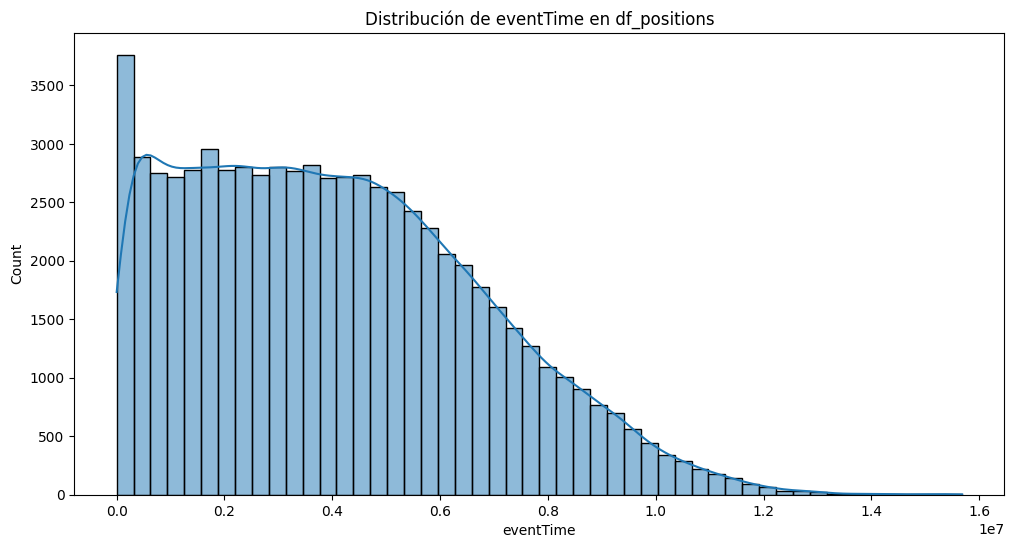

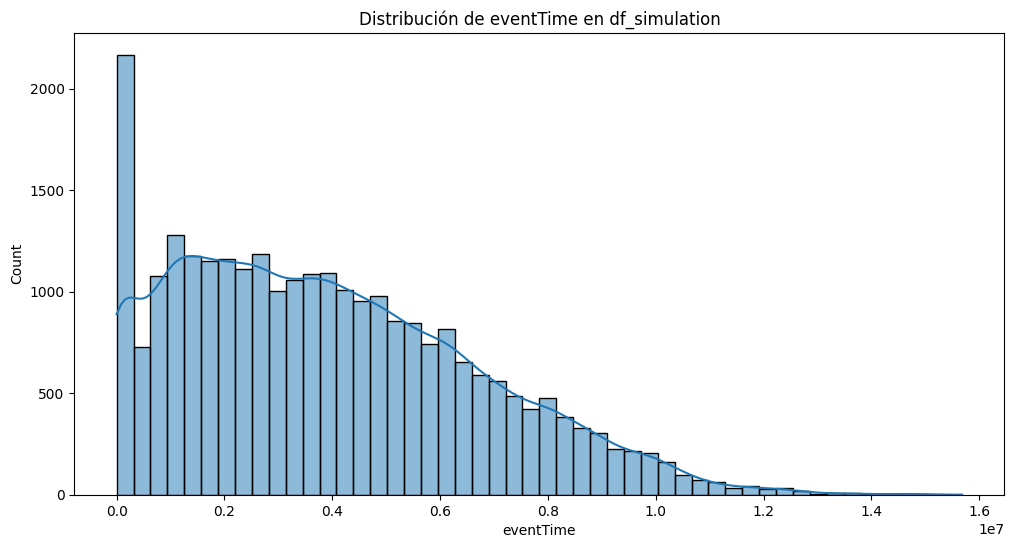

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Visualización de distribución de tiempos
plt.figure(figsize=(12, 6))
sns.histplot(df_positions['eventTime'], bins=50, kde=True)
plt.title("Distribución de eventTime en df_positions")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_simulation['eventTime'], bins=50, kde=True)
plt.title("Distribución de eventTime en df_simulation")
plt.show()

In [10]:
# 6. Verificar valores únicos en columnas clave
print("Valores únicos en simulationId de df_simulation:", df_simulation['simulationId'].nunique())
print("Valores únicos en truckId de df_positions:", df_positions['truckId'].nunique())

Valores únicos en simulationId de df_simulation: 100
Valores únicos en truckId de df_positions: 19


# PREGUNTAS SENCILLAS

## Localización más visitada

In [17]:
location_counts = Counter()
for items in df_plans['items']:
    for item in items:
        location_counts[item['locationId']] += 1
most_visited_location = location_counts.most_common(1)
print("Localización más visitada:", most_visited_location)

Localización más visitada: [('110fa557196f4977f47ee8a8', 31)]


## Número de paquetes recibidos por cada localización

In [18]:
packages_per_location = Counter()
for items in df_plans['items']:
    for item in items:
        packages_per_location[item['locationId']] += 1
print("Paquetes recibidos por localización:", packages_per_location)

Paquetes recibidos por localización: Counter({'110fa557196f4977f47ee8a8': 31, '794ef428d858678e69ec18f4': 26, '544dc8cb8104ca9be64e088e': 24, '3163705e2e4c79485482b907': 24, '6e6eb4d6c2908b30c625409c': 23, '7cf64b3077aaeaf30d2d9a0a': 22, '326ae8dc7810de94ef36cda6': 21, 'f7f92727eca6495955420e45': 21, '31d46e31a77f056cf15f5e18': 21, '3e94f75d0fc870c190c36cd1': 20, 'faf06210580833f8c7963506': 19, '7e20aaca9f596677cb2350c1': 19, '84aec730a62cf23fcfcb9fe0': 19, 'eeb8d69e80ad989fe97f219c': 19, 'bab4334d0b2efeee645c8e36': 19, '06cfc15e50fd94a68f1a9ae1': 19, '71293d97c898e9a1becc840b': 19, 'fe249c3e31b0531b799c5303': 19, '07f5f61af903516b549864b6': 18, '123039c250dd5a3e7c3e4fc8': 18, '7e975a3a8ac9b661a5eeb963': 18, '27dd57ad86f32b35c0eaf1cc': 18, '8ffce61f79bacefe2a6b5f16': 18, '1fc942f4744ab3ea3b8d1009': 18, '047439b0f28cffacd63b07f3': 18, 'c8d0b848c426f58c5e525448': 18, '502e8d84cab29327b2793d0c': 18, '90a34d33b273c9c35b709734': 18, 'b3d26b4ff8cee5912b89d39f': 18, '77290aeb1b49cfa23419961f'

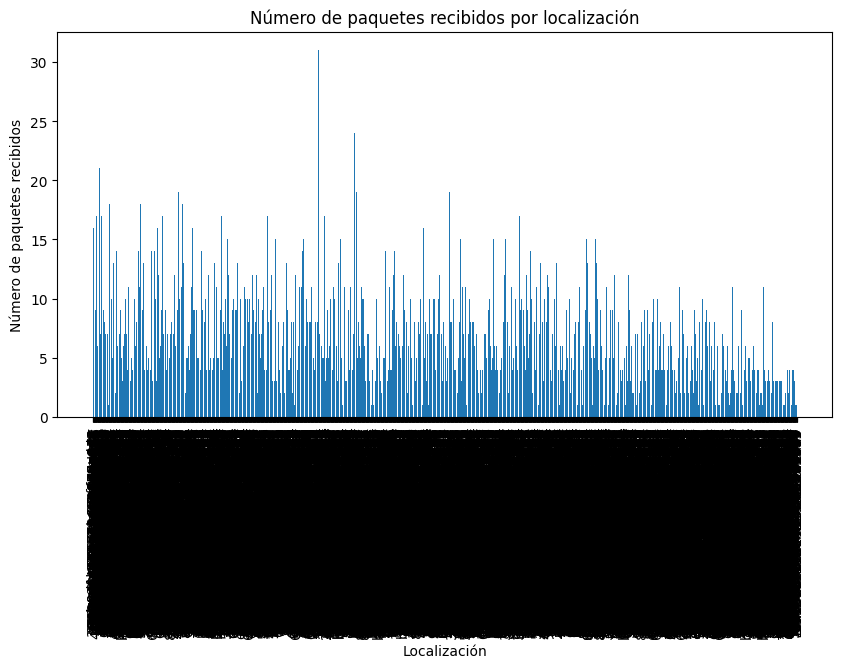

In [26]:
# Visualizar paquetes por localización
plt.figure(figsize=(10,5))
plt.bar(packages_per_location.keys(), packages_per_location.values())
plt.xticks(rotation=90)
plt.xlabel("Localización")
plt.ylabel("Número de paquetes recibidos")
plt.title("Número de paquetes recibidos por localización")
plt.show()

## Número de paquetes transportados en total en cada camión

In [24]:
packages_per_truck = Counter()
for trucks in df_plans['trucks']:
    for truck in trucks:
        packages_per_truck[truck['truck_id']] += len(truck['items'])
print("Paquetes transportados por camión:", packages_per_truck)

Paquetes transportados por camión: Counter({'5534TPH': 3520, '3321FBL': 3428, '3953RLD': 2807, '5030LXK': 1891, '6270NFM': 1707, '0013DYS': 1101, '9593DXM': 712, '8386WZB': 658, '6965XLY': 638, '0781PZL': 468, '2423VRT': 301, '0265TYL': 122, '1669HSZ': 85, '8809GPH': 79, '8327DZH': 31, '1161GJN': 18, '1489WHW': 14, '0184WLX': 10, '1316CKM': 7, '1012GWV': 7})


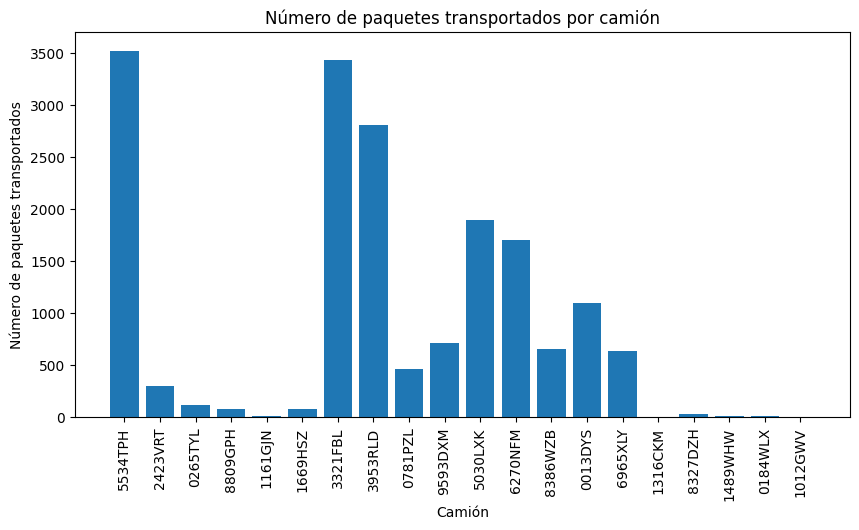

In [27]:
# Visualizar paquetes por camión
plt.figure(figsize=(10,5))
plt.bar(packages_per_truck.keys(), packages_per_truck.values())
plt.xticks(rotation=90)
plt.xlabel("Camión")
plt.ylabel("Número de paquetes transportados")
plt.title("Número de paquetes transportados por camión")
plt.show()

## Número de localizaciones distintas que ha visitado cada camión

In [20]:
locations_per_truck = {}
for _, row in df_positions.iterrows():
    truck_id = row['truckId']
    location = (row['coordinates']['latitude'], row['coordinates']['longitude'])
    if truck_id not in locations_per_truck:
        locations_per_truck[truck_id] = set()
    locations_per_truck[truck_id].add(location)

distinct_locations_per_truck = {truck: len(locations) for truck, locations in locations_per_truck.items()}
print("Localizaciones distintas visitadas por camión:", distinct_locations_per_truck)

Localizaciones distintas visitadas por camión: {'1669HSZ': 691, '8809GPH': 695, '1161GJN': 112, '2423VRT': 1289, '3321FBL': 9350, '0265TYL': 493, '5534TPH': 10788, '0013DYS': 4578, '5030LXK': 8308, '8386WZB': 4574, '3953RLD': 8124, '9593DXM': 6185, '0781PZL': 1770, '6965XLY': 4438, '6270NFM': 6679, '8327DZH': 214, '1489WHW': 197, '1012GWV': 74, '0184WLX': 78}


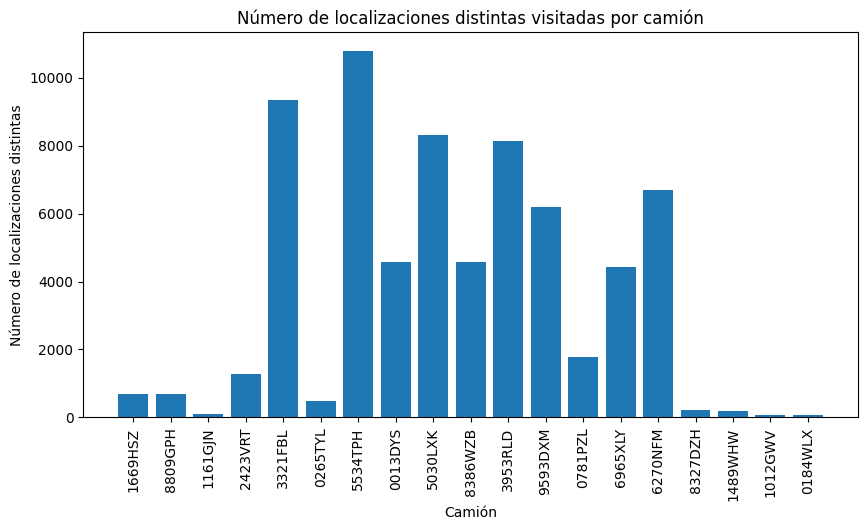

In [28]:
# Visualizar localizaciones distintas por camión
plt.figure(figsize=(10,5))
plt.bar(distinct_locations_per_truck.keys(), distinct_locations_per_truck.values())
plt.xticks(rotation=90)
plt.xlabel("Camión")
plt.ylabel("Número de localizaciones distintas")
plt.title("Número de localizaciones distintas visitadas por camión")
plt.show()

## Distribución del número de eventos de cada tipo

In [21]:
event_distribution = df_simulation['eventType'].value_counts()
print("Distribución de eventos:", event_distribution)

Distribución de eventos: eventType
Truck ended delivering      8669
Truck started delivering    8669
Truck departed              3481
Truck arrived               3481
Truck received packets       647
Truck initialized            647
Truck departed to depot      647
Truck ended route            646
Name: count, dtype: int64


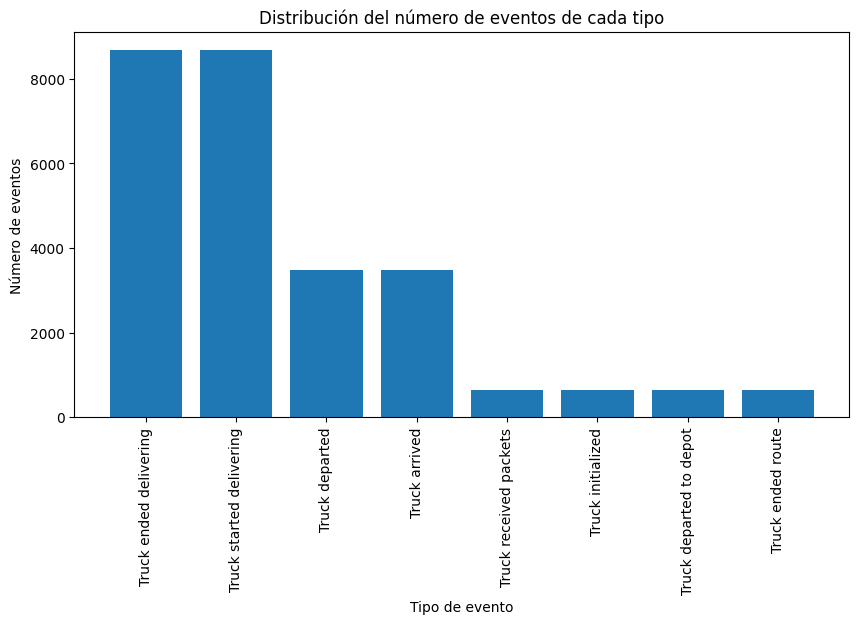

In [29]:
# Visualizar distribución de eventos
plt.figure(figsize=(10,5))
plt.bar(event_distribution.index, event_distribution.values)
plt.xticks(rotation=90)
plt.xlabel("Tipo de evento")
plt.ylabel("Número de eventos")
plt.title("Distribución del número de eventos de cada tipo")
plt.show()

## Número de paquetes que lleva cada camión en cada viaje

In [25]:
packages_per_trip = {}
for _, row in df_plans.iterrows():
    for truck in row['trucks']:
        truck_id = truck['truck_id']
        trip_id = row['simulationId']
        if truck_id not in packages_per_trip:
            packages_per_trip[truck_id] = {}
        packages_per_trip[truck_id][trip_id] = len(truck['items'])

print("Paquetes por camión en cada viaje:", packages_per_trip)

Paquetes por camión en cada viaje: {'5534TPH': {'2f6737c6-8d69-46b9-9534-68ffa2e7f7ad': 28, '89e71177-6a7b-41eb-858a-ecaf434fdd8b': 23, 'd4bef456-20a5-440e-94f5-eb6957479158': 25, 'e825e855-b32f-42d2-a84a-e2211b88a90a': 17, '93914b99-1f22-424e-9a42-ae94f1239dcb': 14, 'ba702cf3-c8d7-4a58-83be-c28db0f57374': 7, 'd222c761-036f-4df3-a108-0b275571ca65': 29, '374acaaf-3bea-424f-82c2-3944d10e5b7e': 16, '2d2b3d0c-ed22-4524-9b0d-03f51e9a5eae': 8, '71c7c50d-c025-4c02-b86f-e079a10cb44d': 19, 'aff27ad4-79d0-4b1a-9551-42121a10777b': 23, '9c0b5929-2e5a-431b-b959-13542d4e431f': 28, '6ff20fed-5a85-4680-a384-09a321dbecbe': 21, 'b64d3542-8092-4550-83fc-2961aa1d0755': 5, 'bde99c9d-ac2e-4366-a880-b271d8b2a918': 7, 'e716bc2b-8f8d-4889-add3-74f33ba47bb9': 19, '2e0c39cf-09ef-4c98-b6bc-424ffb32b0fe': 20, 'f772ea51-b196-4f49-b61e-047e8ee15bd2': 30, 'fd4bc7cb-f234-4653-a87d-2514d6df6eca': 29, '7f6102b6-beaa-4dbc-9144-585602b73069': 11, 'd4680a2a-e970-4bbe-ba84-f13ba6bccd37': 26, 'd37d82b5-696e-4fe4-9867-1262068

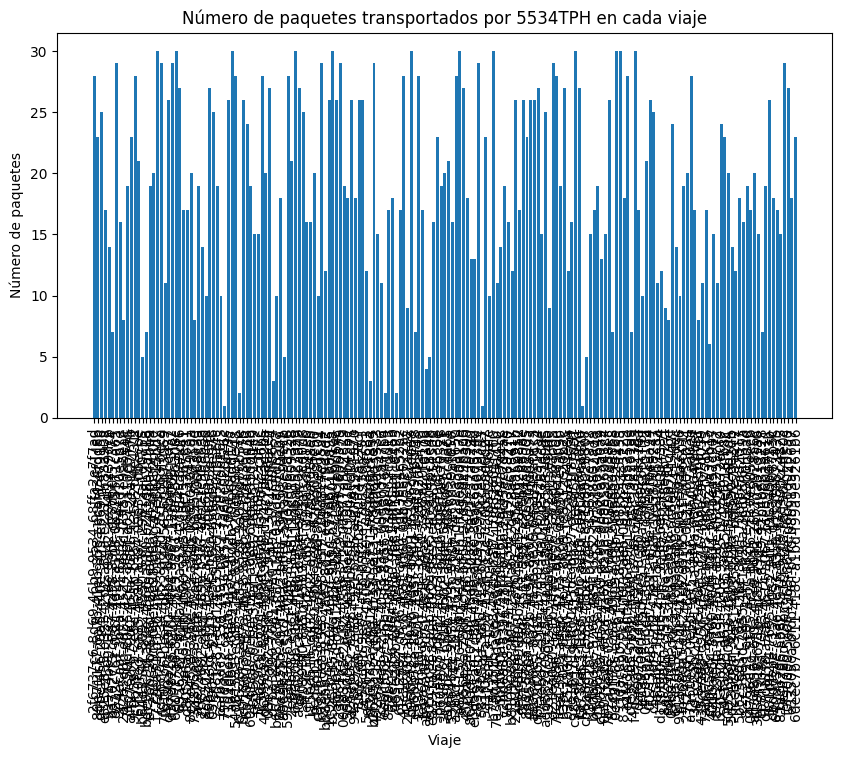

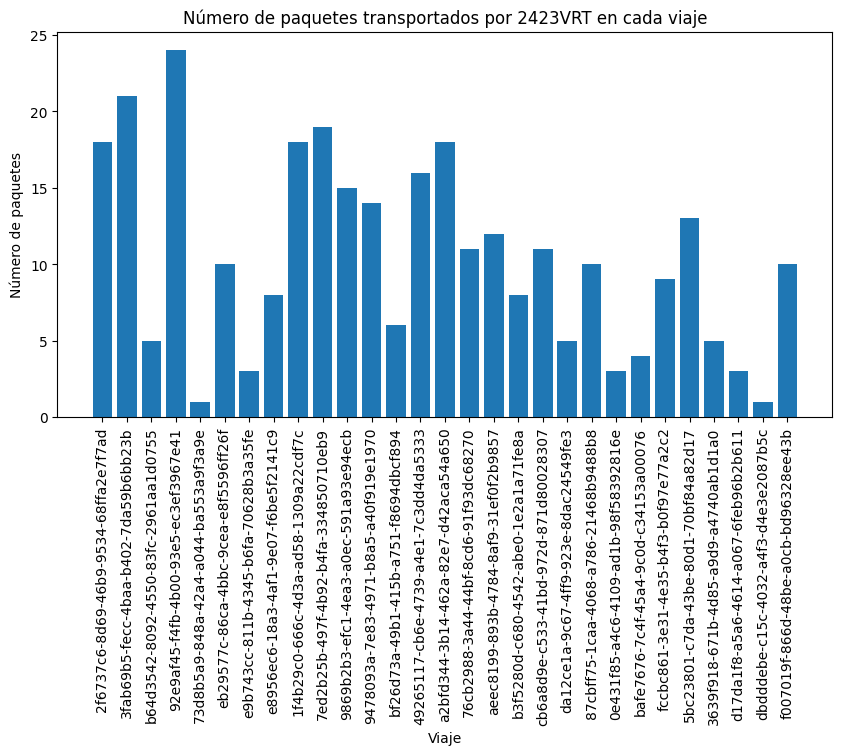

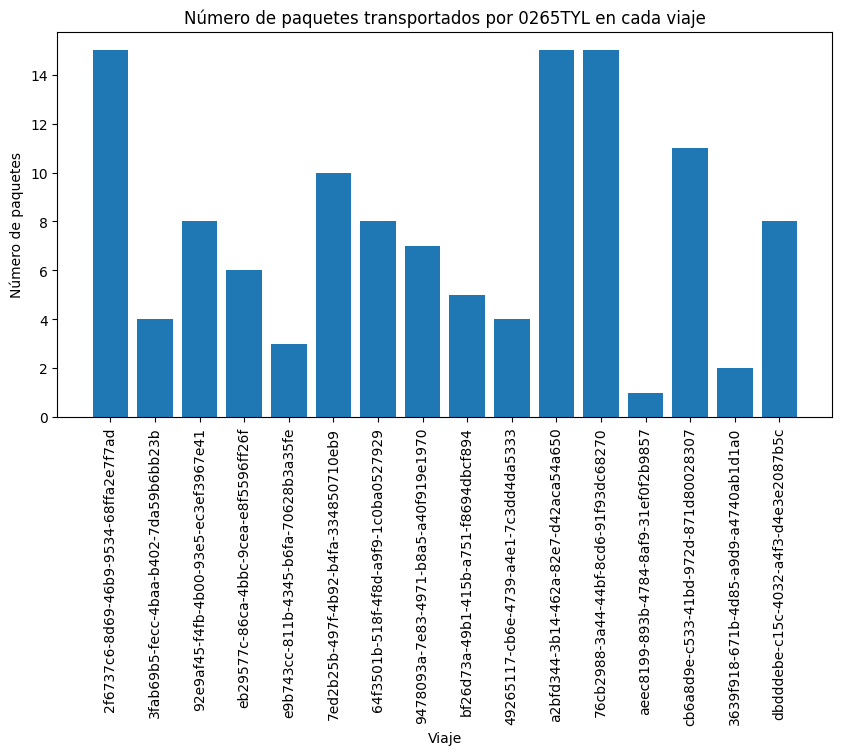

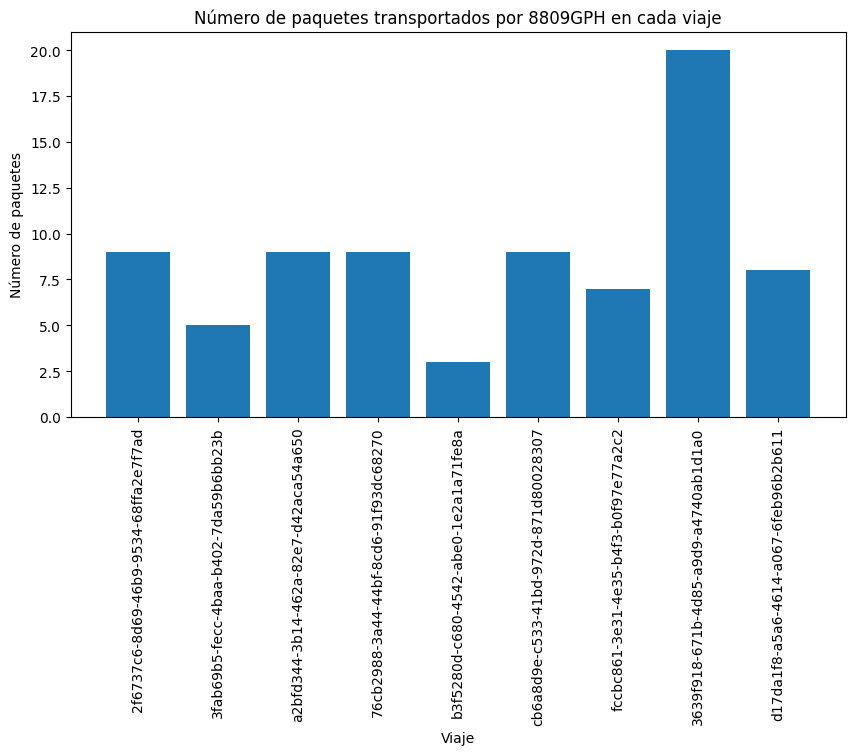

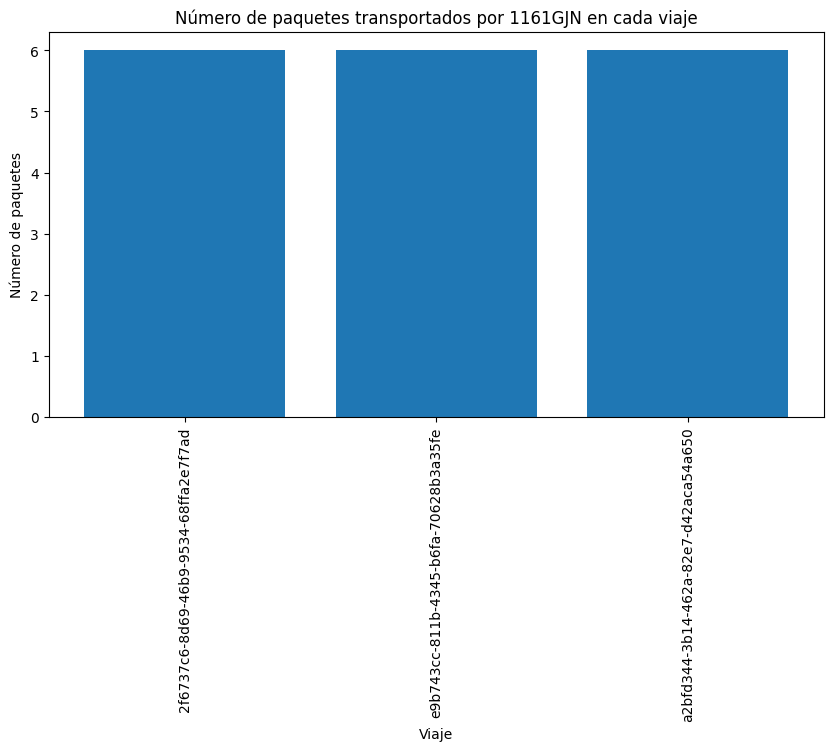

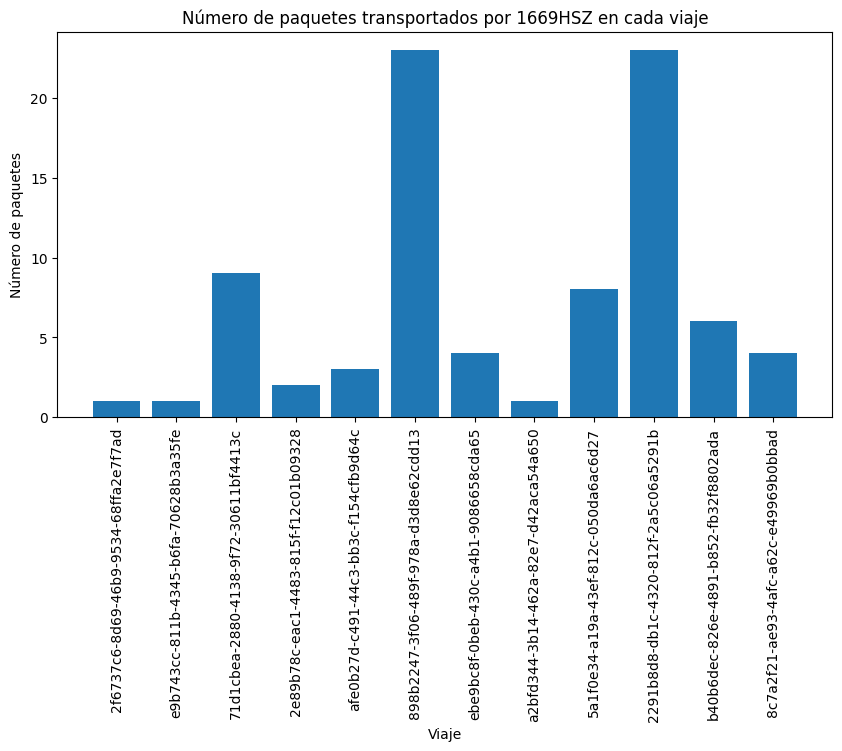

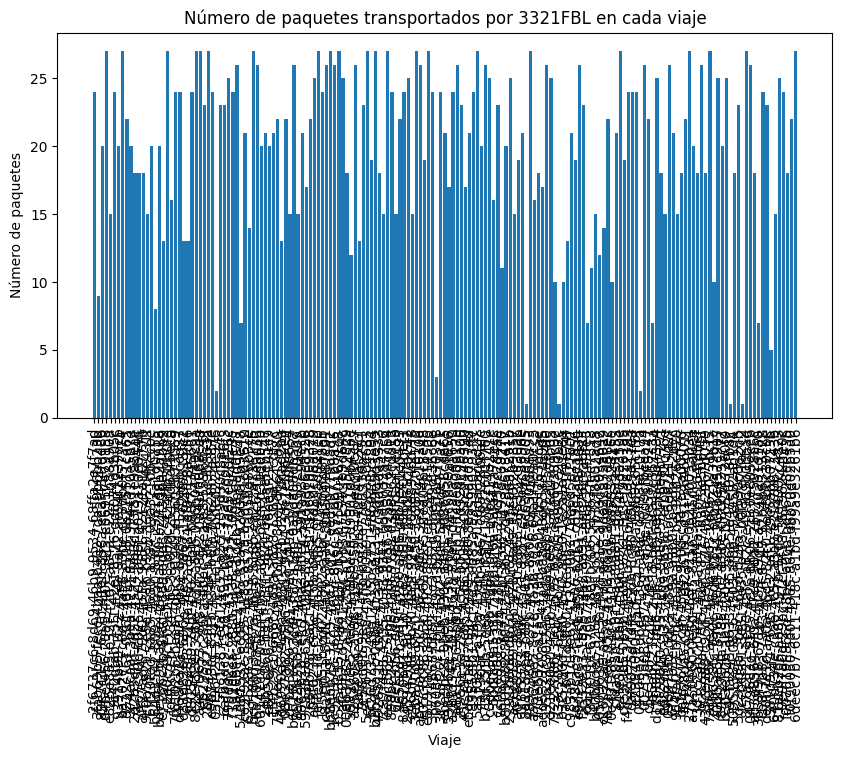

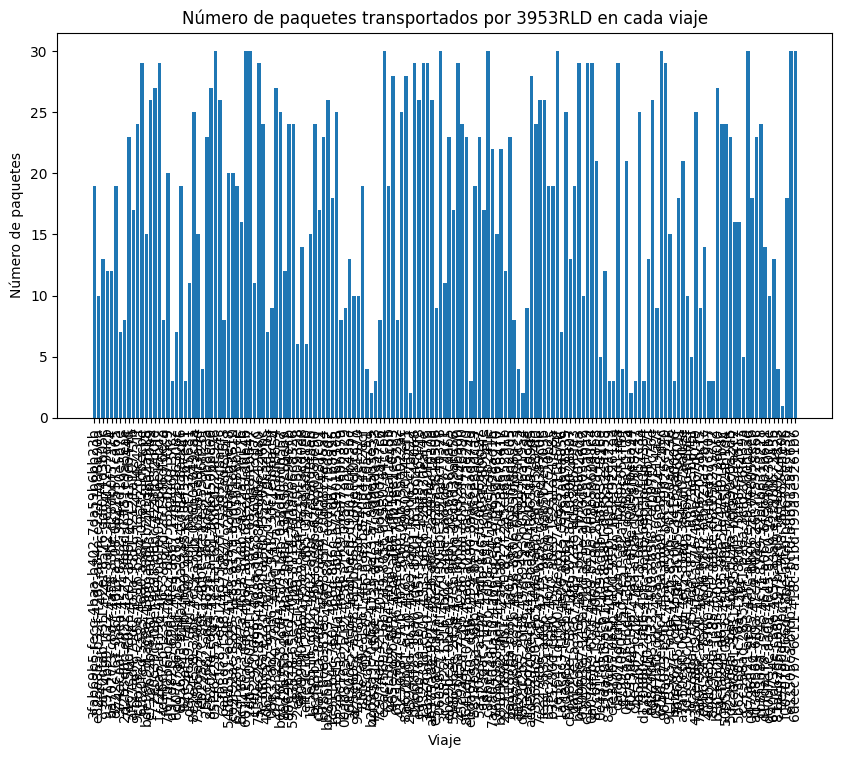

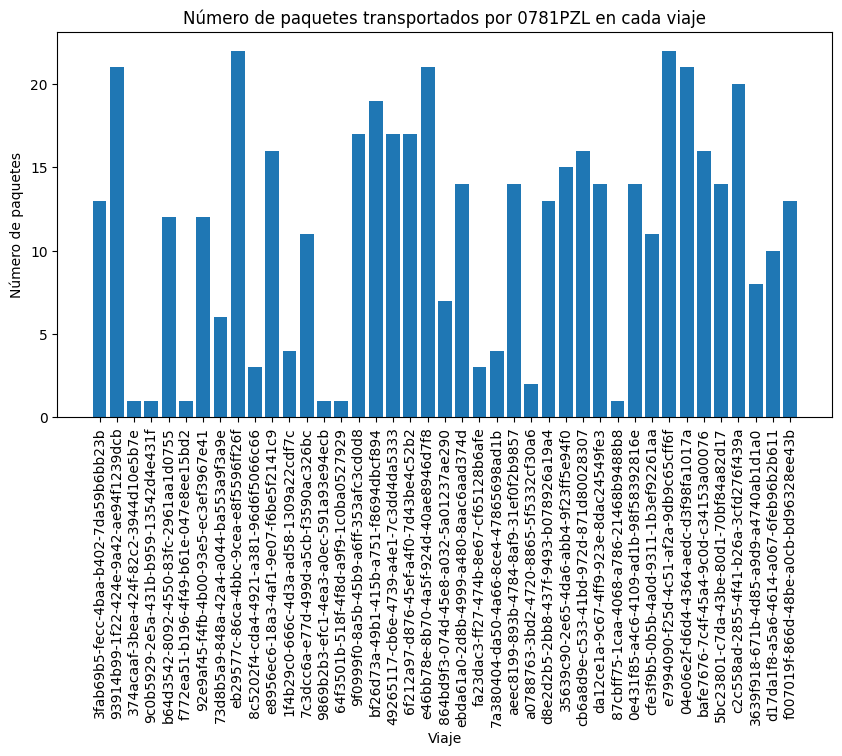

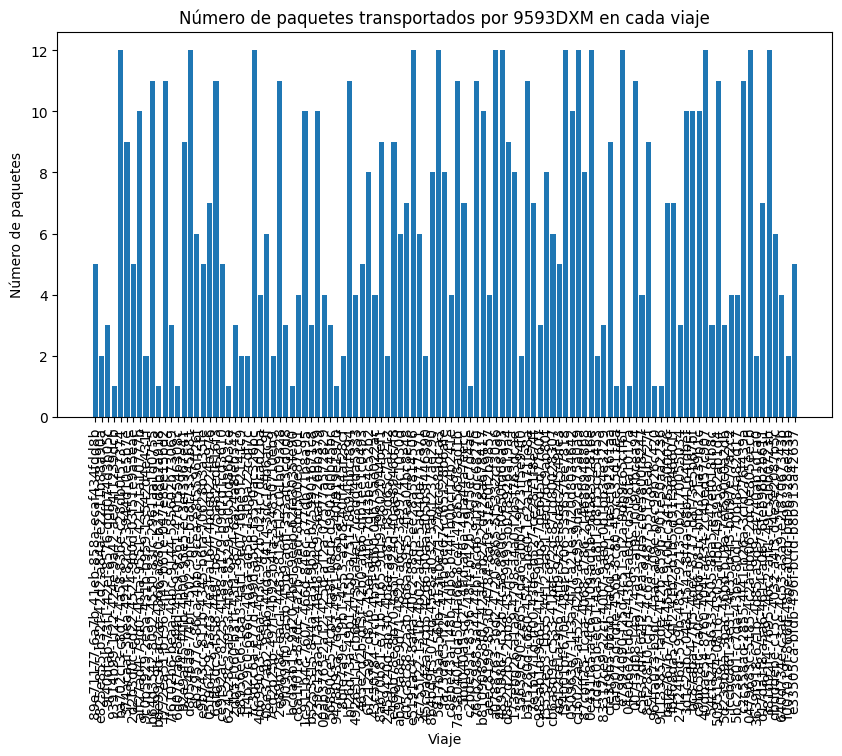

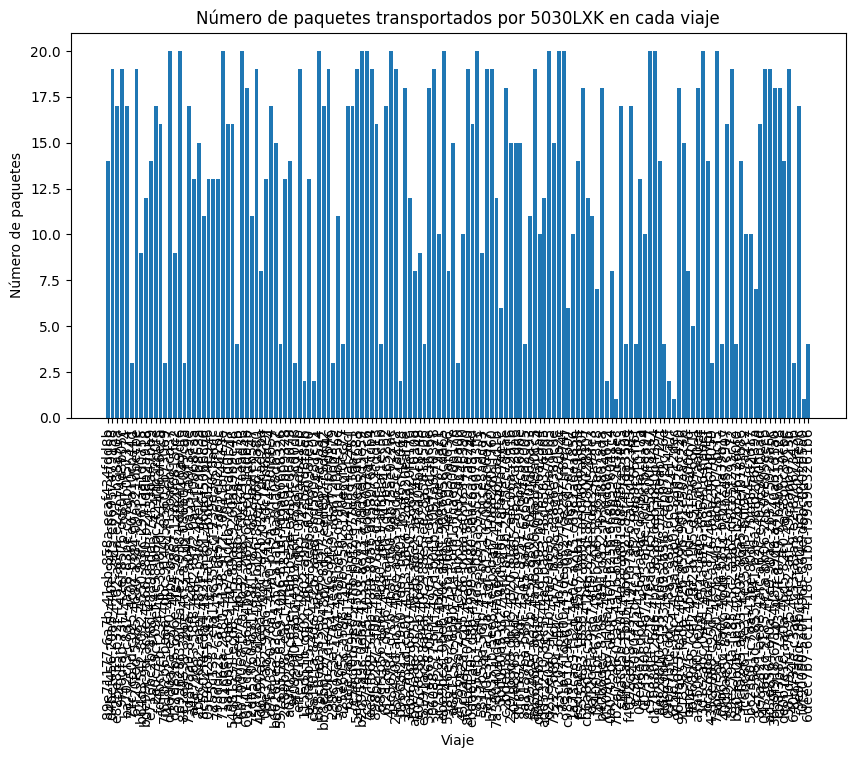

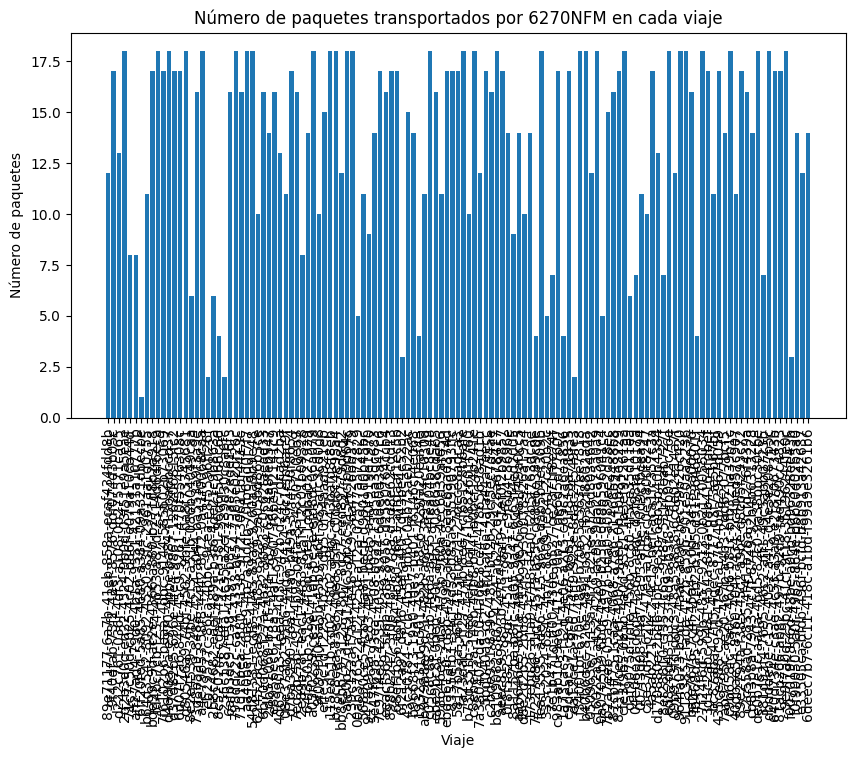

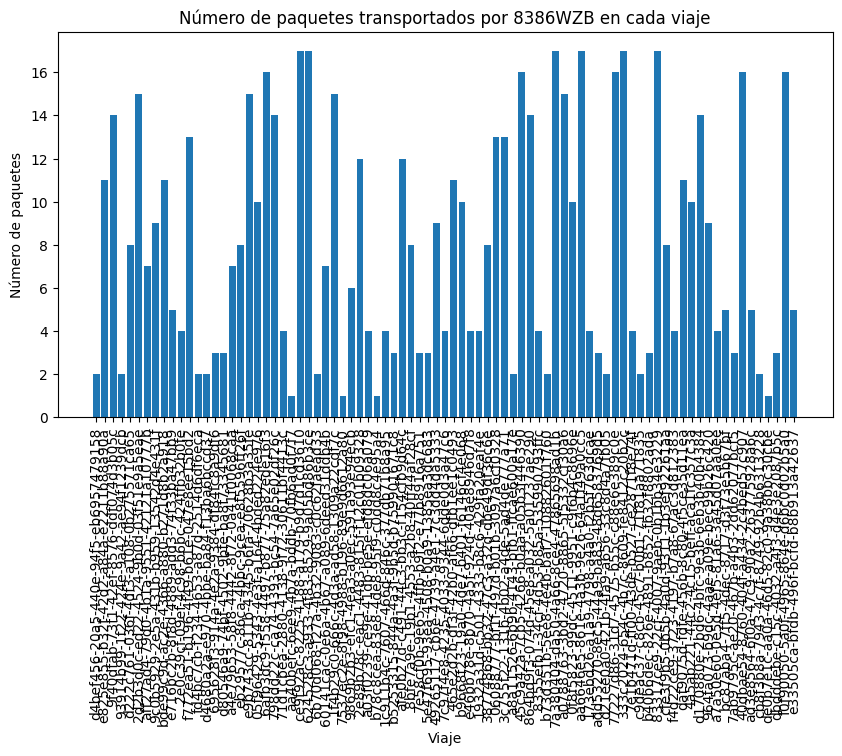

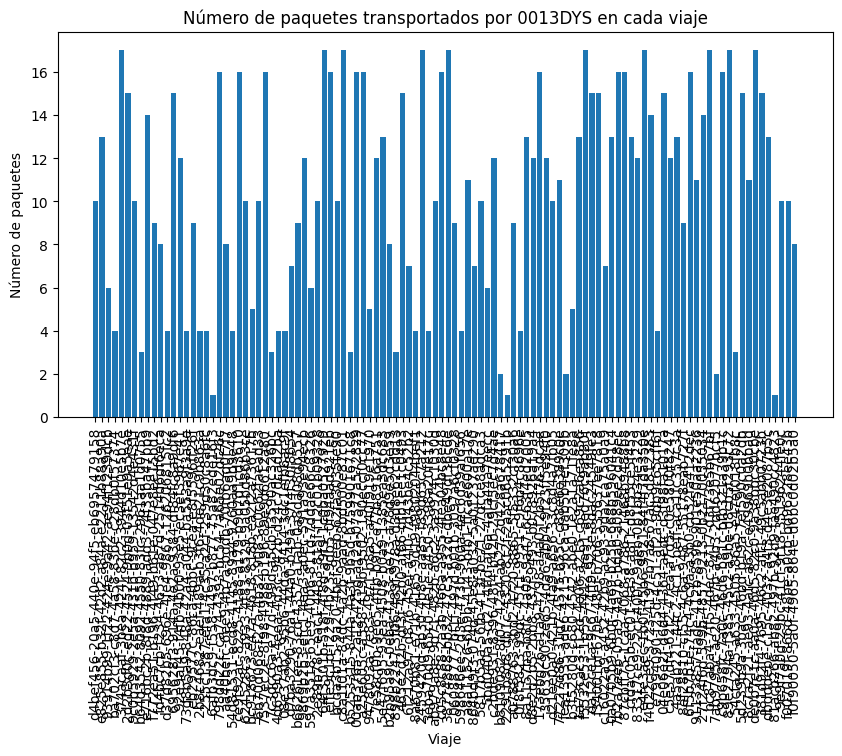

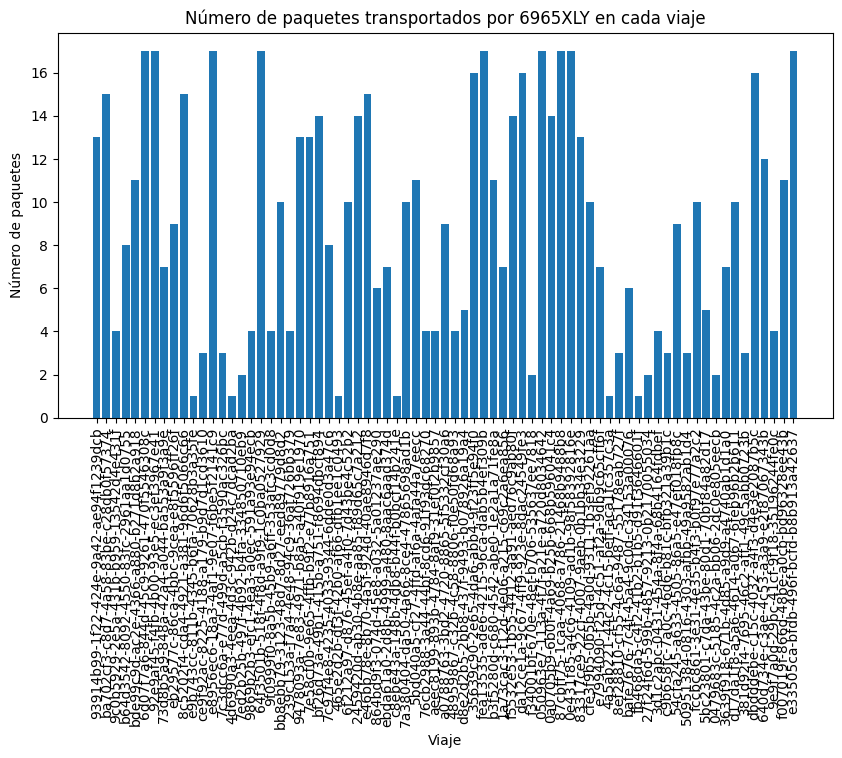

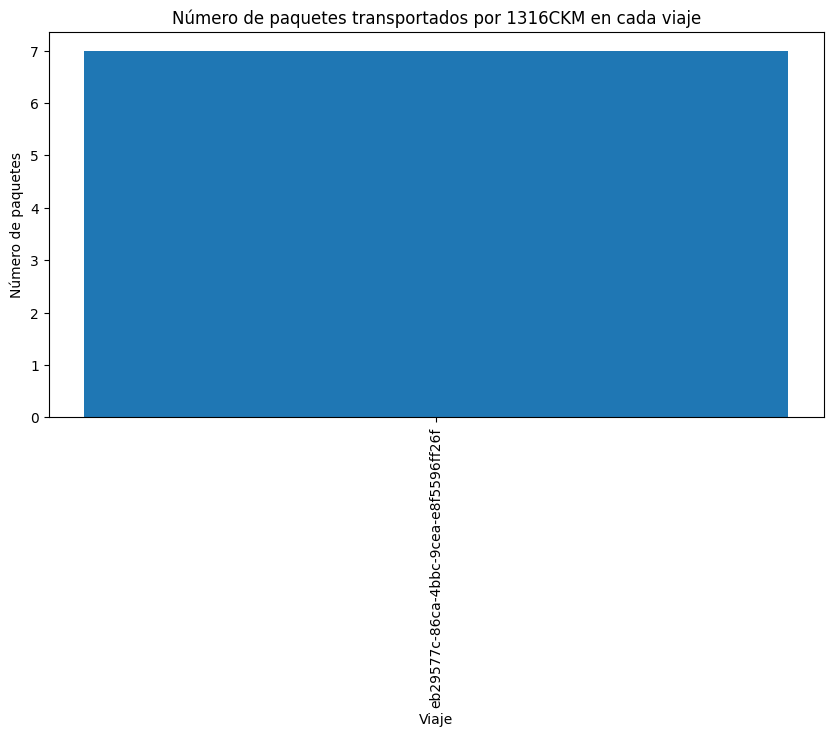

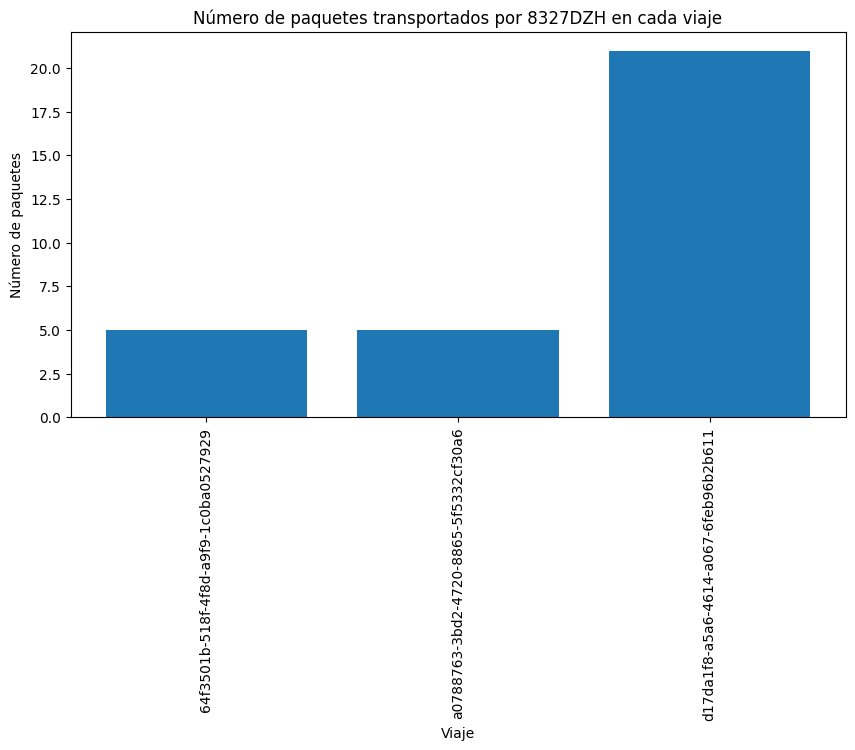

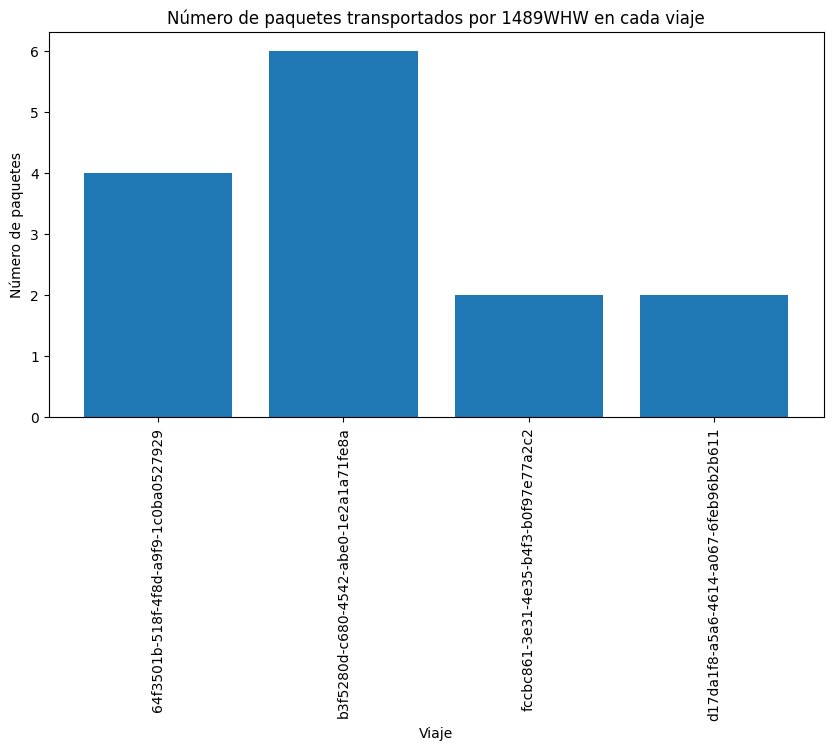

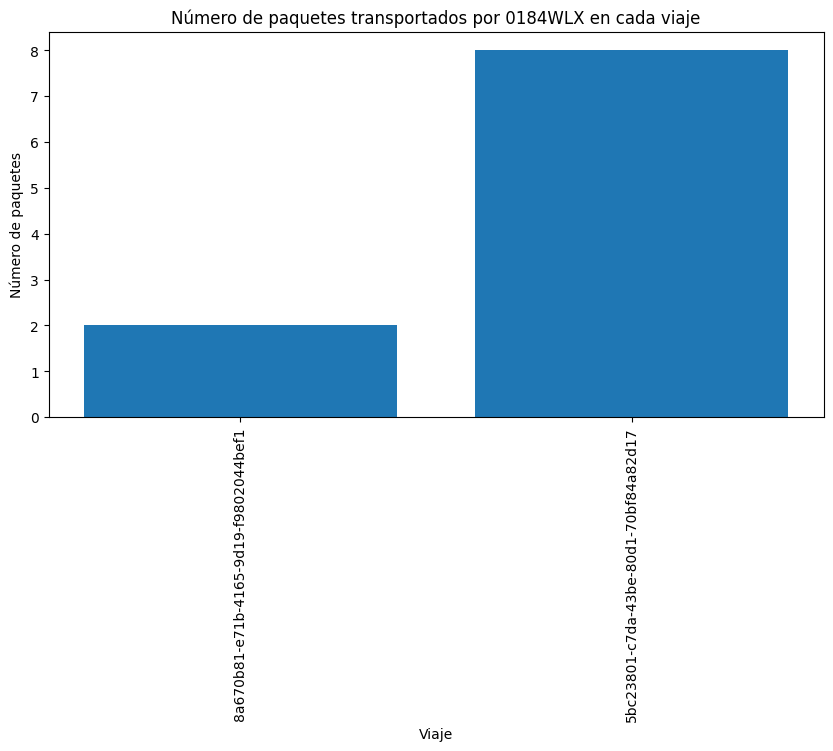

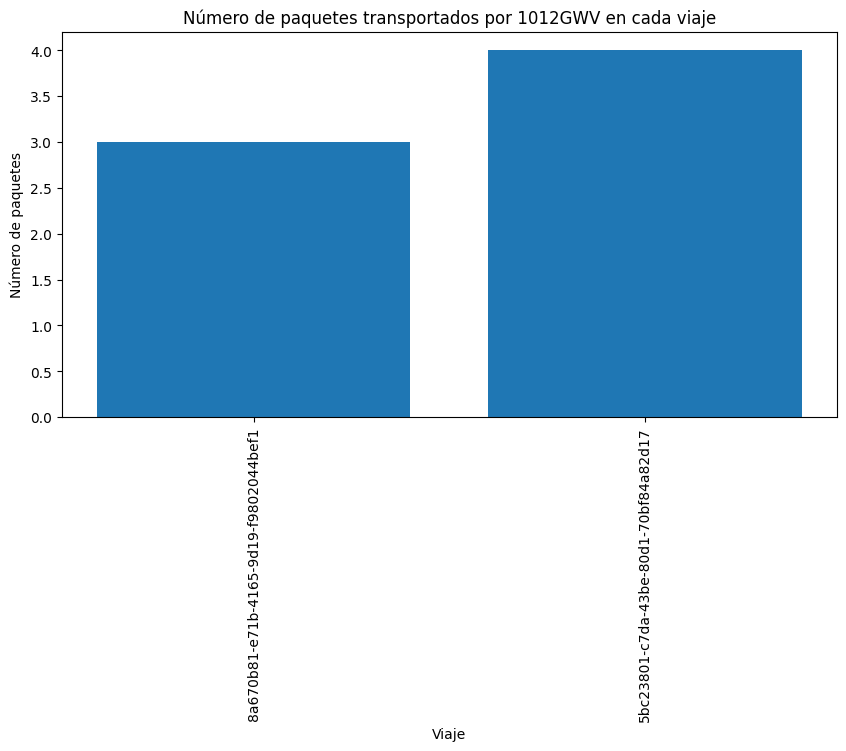

In [30]:
# Visualizar paquetes por camión en cada viaje
for truck_id, trips in packages_per_trip.items():
    plt.figure(figsize=(10,5))
    plt.bar(trips.keys(), trips.values())
    plt.xticks(rotation=90)
    plt.xlabel("Viaje")
    plt.ylabel("Número de paquetes")
    plt.title(f"Número de paquetes transportados por {truck_id} en cada viaje")
    plt.show()

# PREGUNTAS MEDIAS

## La localización que más camiones (distintos) han visitado

In [ ]:
df_positions['location'] = df_positions['coordinates'].astype(str)
location_counts = df_positions.groupby('location')['truckId'].nunique()
most_visited_location = location_counts.idxmax()
print("Localización más visitada por camiones distintos:", most_visited_location)

## Tiempo de viaje máximo, mínimo y medio

In [ ]:
df_simulation = df_simulation.sort_values(by=['simulationId', 'truckId', 'eventTime'])
df_simulation['time_diff'] = df_simulation.groupby(['simulationId', 'truckId'])['eventTime'].diff()

max_travel_time = df_simulation['time_diff'].max()
min_travel_time = df_simulation['time_diff'].min()
avg_travel_time = df_simulation['time_diff'].mean()
print("Tiempo de viaje máximo:", max_travel_time)
print("Tiempo de viaje mínimo:", min_travel_time)
print("Tiempo de viaje medio:", avg_travel_time)

## Tiempo de entrega máximo, mínimo y medio

In [ ]:
delivery_events = df_simulation[df_simulation['eventType'].str.contains("delivery", case=False, na=False)]
max_delivery_time = delivery_events['time_diff'].max()
min_delivery_time = delivery_events['time_diff'].min()
avg_delivery_time = delivery_events['time_diff'].mean()
print("Tiempo de entrega máximo:", max_delivery_time)
print("Tiempo de entrega mínimo:", min_delivery_time)
print("Tiempo de entrega medio:", avg_delivery_time)

## Nº de horas que cada camión ha estado activo

In [ ]:
df_truck_time = df_simulation.groupby('truckId')['time_diff'].sum()
print("Horas activas de cada camión:")
print(df_truck_time)

## Diferencia de tiempos entre un evento y el siguiente (de la misma simulación y mismo camión)

In [ ]:
df_simulation['event_origin'] = df_simulation.groupby(['simulationId', 'truckId'])['eventTime'].shift(1)
df_simulation['time_between_events'] = df_simulation['eventTime'] - df_simulation['event_origin']
time_by_event_type = df_simulation.groupby('eventType')['time_between_events'].mean()
print("Tiempo medio entre eventos por tipo:")
print(time_by_event_type)